<a href="https://colab.research.google.com/github/kuonumber/data_driven_marketing/blob/master/data_pilot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
import pandas as pd
# from pandas_profiling import ProfileReport
from google.colab import drive
import matplotlib.pyplot as plt
import pytz
import numpy as np


In [ ]:
drive.mount('/gdrive')


In [ ]:
!ls /gdrive/'My Drive'/'Colab Notebooks'/kkday/

In [ ]:
%cd  '/gdrive/My Drive/Colab Notebooks/kkday/' 

In [ ]:
!ls

In [ ]:
! df -h

In [ ]:
file_path = '/gdrive/My Drive/Colab Notebooks/kkday/'

In [ ]:
# ! unzip /gdrive/'My Drive'/'Colab Notebooks'/kkday/使用者行為.csv.zip

In [ ]:
!ls

In [ ]:
df_user_behaviour = pd.read_csv('./使用者行為.csv')
df_user_info = pd.read_csv('./使用者資訊.csv')
df_area = pd.read_csv('./地區細項表.csv')
df_product_info = pd.read_csv('./產品資訊.csv')
df_booking = pd.read_csv('./訂單資訊.csv')
df_bad_bill = pd.read_csv('./爭議帳款.csv')
df_fraudulent_reason = pd.read_csv('./盜刷原因.csv')
df_act = pd.read_csv('./分類細項表.csv')

## profiling

In [ ]:
# ! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
# prof_user_behaviour = ProfileReport(df_user_behaviour)
# prof_user_info = ProfileReport(df_user_info)
# prof_area = ProfileReport(df_area)
# prof_product = ProfileReport(df_product_info)
# prof_booking = ProfileReport(df_booking)
# prof_bill = ProfileReport(df_bad_bill)
# prof_fraudulent_reason = ProfileReport(df_fraudulent_reason)

# prof.to_file(output_file='output.html')

In [ ]:
prof_user_behaviour

In [ ]:
# pd.read_csv(file_path + '分類細項表.csv').head(3),
# pd.read_csv(file_path + '盜刷原因.csv').head(3),
# pd.read_csv(file_path + '地區細項表.csv').head(3),
# pd.read_csv(file_path + '訂單資訊.csv').head(3),
# pd.read_csv(file_path + '爭議帳款.csv').head(3),
# pd.read_csv(file_path + '使用者資訊.csv').head(3),
# pd.read_csv(file_path + '產品資訊.csv').head(3),


## EDA

In [ ]:
df_user_behaviour.action_time = pd.to_datetime(df_user_behaviour.action_time)
df_user_info.create_date = pd.to_datetime(df_user_info.create_date)
df_booking.create_date = pd.to_datetime(df_booking.create_date)
df_booking.go_date = pd.to_datetime(df_booking.go_date )
df_booking.back_date = pd.to_datetime(df_booking.back_date )

In [ ]:
df_booking['revenue'] = df_booking.price *df_booking.qty

In [ ]:
df_area.head()
df_bad_bill.head()
df_booking.head()
# df_fraudulent_reason.head(10)
df_product_info.head()
# df_user_behaviour.info()
df_user_info.head()
df_act

In [ ]:
df_product_info

In [ ]:
df_product_info.head().iloc[0]['cities']


In [ ]:
df_booking.head()


In [ ]:
df_act

In [ ]:
df_area.columns

In [ ]:
df_area.query('area_cd=="A01-005-00001"')

In [ ]:
df_product_info.query('prod_oid=="13931"')

In [ ]:
# df_booking.prod_id.value_counts().reset_index(drop=True)
(df_booking.prod_id.value_counts().reset_index(drop=True).cumsum()/df_booking.prod_id.value_counts().reset_index(drop=True).sum()).head(500)

In [ ]:
!ls

In [ ]:
df_product_detail = pd.read_csv('./產品資訊_完整map_use (1).csv')

In [ ]:
df_product_detail.country_cd.value_counts().head(50)

In [ ]:
df_product_detail[df_product_detail.prod_oid !=df_product_detail.prod_id]

In [ ]:
df_product_detail.head()

In [ ]:
df_product_detail_ = df_product_detail[['prod_oid','tags_small','short_nm','country_cd']]

In [ ]:
df_booking_2019 = pd.merge(df_booking, df_product_detail_, left_on='prod_id', right_on='prod_oid')

In [ ]:
df_booking_2019

In [ ]:
pop_country = ['DE', 'NZ', 'ES', 'IT', 'ID', 'UK', 'FR', 'VN', 'MY', 'CN', 'SG', 'MO',
       'AU', 'US', 'PH', 'TH', 'HK', 'KR', 'TW', 'JP']

In [ ]:
pop_country

In [ ]:
(df_booking_2019.query('country_cd in @ pop_country').groupby([pd.Grouper(key='create_date', freq='M'),'country_cd'])['country_cd']
.count().unstack().plot(kind='area', figsize=(15,7), cmap='tab20'))
plt.legend( bbox_to_anchor=(0.6, 0., 0.48, 0.9)  )
plt.title('Top20')

In [ ]:
df_booking.columns

In [ ]:
df_booking_201912 = df_booking[df_booking.create_date>="20191201"].reset_index(drop=True)

In [ ]:
df_booking_201912 = pd.merge(df_booking_201912, df_product_detail_, left_on='prod_id', right_on='prod_oid')

In [ ]:
df_booking_201912.tags_small.value_counts()[0:20]

In [ ]:
df_booking_201912.head()

In [ ]:
df_booking_201912.query('tags_small=="WiFi & SIM卡"').short_nm.value_counts()
# .groupby(['tags_small'])['tags_small'].count().sort_values()

In [ ]:
df_booking_201912.query('tags_small=="交通票券"').short_nm.value_counts()


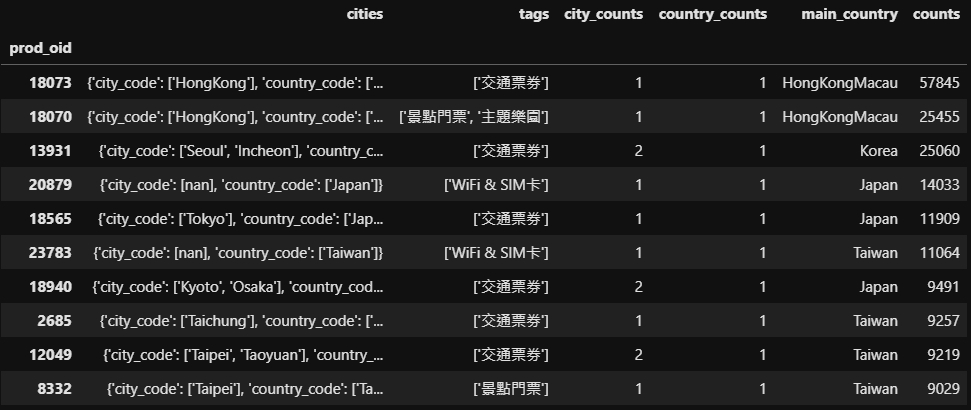

In [ ]:
# city_counts 是他購買的項目會橫跨幾個城市
# country_counts 是他購買的項目會橫跨幾個國家
# main country 是他購買的項目的出現最多次的國家
# counts 是這個產品在訂單資訊裡面出現的次數

# 營運指標


## DAU (daily active users)

*  活躍用戶，隨著每間公司的營運目標都會有所不同  
* [你的企業營運指標設對了嗎？](https://medium.com/asiayo-engineering/%E4%BD%A0%E7%9A%84%E4%BC%81%E6%A5%AD%E7%87%9F%E9%81%8B%E6%8C%87%E6%A8%99%E8%A8%AD%E5%B0%8D%E4%BA%86%E5%97%8E-%E8%A8%AD%E5%AE%9A%E9%97%9C%E9%8D%B5%E6%8C%87%E6%A8%99%E5%B8%B8%E8%A6%8B%E7%9A%84%E5%9B%9B%E5%A4%A7%E9%8C%AF%E8%AA%A4-cef5e9ac9883)

In [ ]:
df_user_behaviour.action.value_counts()

In [ ]:
df_user_behaviour.groupby('member_id').agg({'action':'value_counts'})

In [ ]:
df_user_behaviour_count = _

In [ ]:
df_user_behaviour_count.columns = ['action_count']

In [ ]:
df_user_behaviour_count = df_user_behaviour_count.unstack()

In [ ]:
df_user_behaviour_count = df_user_behaviour_count.droplevel(level=0, axis=1)

In [ ]:
df_user_behaviour_count.shape

In [ ]:
df_user_behaviour_count = df_user_behaviour_count.fillna(0)

In [ ]:
df_user_behaviour_count.groupby('pay').agg({'view': ['sum'], 'pay':['sum']})

In [ ]:
d_p = {}
for p in df_user_behaviour_count.pay.unique():
    d_p[p] = df_user_behaviour_count[df_user_behaviour_count.pay == p].pay.sum()/df_user_behaviour_count[df_user_behaviour_count.pay == p].view.sum()

In [ ]:
df_c_rate = pd.DataFrame([d_p]).T

In [ ]:
df_c_rate[df_c_rate<1].dropna().sort_index().plot(kind='box', title='pay than once')

In [ ]:
df_c_rate[df_c_rate<1].dropna().mean()

In [ ]:
df_user_behaviour_count.query('pay==126').pay.sum()/df_user_behaviour_count.query('pay==126').view.sum()

In [ ]:
df_user_behaviour_count.query('pay==1').pay.sum()/df_user_behaviour_count.query('pay==1').view.sum()

In [ ]:
df_user_behaviour_count.query('pay==2').pay.sum()/df_user_behaviour_count.query('pay==2').view.sum()

In [ ]:
df_user_behaviour_count.query('booking<pay').pay.sum()/df_user_behaviour_count.query('booking<pay').view.sum()

In [ ]:
df_user_behaviour_count

In [ ]:
# 行為類別 (5)
# home 觀看首頁 list 觀看商品列表 view 觀看產品頁 booking 下訂 pay 付款


## CPC / CPA

In [ ]:
df_change_rate

In [ ]:
df_action_daily_count = df_user_behaviour.groupby([pd.Grouper(key='action_time', freq='D'), 'action'])['member_id'].count()

In [ ]:
df_action_daily_count = df_action_daily_count.unstack()

In [ ]:
# (df_action_daily_count.pay / df_action_daily_count.view).plot(cmap='Set3', figsize=(15,7), title='View to Pay')
(df_action_daily_count.pay / df_action_daily_count.booking).plot(cmap='Set3', figsize=(15,7), title='Booking to Pay')

In [ ]:
plt.figure(dpi=400, figsize=(15,7))
df_action_daily_count.plot(kind='area', figsize=(15,7), 
                           cmap='Set3',
                        #    stacked=False,
                           )


In [ ]:
plt.figure(dpi=400, figsize=(15,7))
df_action_daily_count.plot()

In [ ]:
df_user_info.head()

In [ ]:
df_user_info.groupby([pd.Grouper(key='create_date', freq='D')])['member_id'].count().sort_index()

In [ ]:
df_user_info.create_date.max()

In [ ]:
df_user_info

In [ ]:
df_action_daily_count.corr()

In [ ]:
# len(df_user_behaviour)

In [ ]:
df_user_info_action = pd.merge( df_user_behaviour, df_user_info, on='member_id')

In [ ]:
df_user_info_action.create_date.max()

In [ ]:
df_user_info_action['m_age'] = (df_user_info_action.action_time.max() - df_user_info_action.create_date.dt.tz_localize('UTC')).dt.days


In [ ]:
df_user_info_action.drop_duplicates(['member_id'])['m_age'].value_counts().plot(kind='hist', 
                                                                                cumulative=True, density=1, bins=30, cmap='gray',
                                                                                title='Membership until 20191231')
plt.ylabel('%')
plt.xlabel('days')

In [ ]:
(df_user_info_action.query('m_age<=365').shape[0] / len(df_user_info_action),
df_user_info_action.query('730>m_age>365').shape[0] / len(df_user_info_action),
df_user_info_action.query('m_age>730').shape[0] / len(df_user_info_action),
)

In [ ]:
df_user_info_action.groupby([pd.Grouper(key='action_time', freq='M'),'action','prod_id'])['action'].count()

In [ ]:
df_change_rate = _

In [ ]:
df_change_rate = df_change_rate.unstack().unstack()

In [ ]:
df_change_rate.head()

In [ ]:
df_change_rate_ = (df_change_rate.xs(key='pay',level=1, axis=1)/df_change_rate.xs(key='view',level=1, axis=1))

In [ ]:
df_change_rate_.dropna(axis=1).max()

##  Retention Rate

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from operator import attrgetter
import matplotlib.colors as mcolors

In [ ]:
# df_user_info_pay = df_user_info_action.query('action=="pay"')


In [ ]:
# df_user_info_pay.head()

In [ ]:
# df_booking

In [ ]:
n_orders = df_booking.groupby(['member_id'])['order_id'].nunique()
mult_orders_perc = np.sum(n_orders > 1) / df_booking['member_id'].nunique()
print(f'{100 * mult_orders_perc:.2f}% of customers ordered more than once.')

In [ ]:
n_orders.sort_values()

In [ ]:
ax = sns.distplot(n_orders, kde=False, hist=True)
ax.set(title='Distribution of number of orders per customer',
       xlabel='# of orders', 
       ylabel='# of customers');

In [ ]:
df_booking_cum = df_booking.query('order_status=="BACK"').groupby('member_id').agg({'revenue':sum, 'order_id':'count'}).sort_values('order_id')
# 訂單狀態 (3) 
# BACK 完成 FAIL 交易失敗 CX 取消


In [ ]:
df_booking_cum['revenue_cum_pct'] = round(df_booking_cum.revenue.cumsum()/df_booking_cum.revenue.sum(),6)

In [ ]:
df_booking_cum.query('order_id==1').shape[0]/ len(df_booking_cum)

In [ ]:
df_booking_cum.query('order_id==1')

In [ ]:
# df_booking.query('create_date>back_date').shape[0]/ df_booking.shape[0]

In [ ]:
# df_booking.query('back_date>go_date').shape[0]/ df_booking.shape[0]

In [ ]:
# df['order_month'] = df['InvoiceDate'].dt.to_period('M')
# df['cohort'] = df.groupby('CustomerID')['InvoiceDate'] \
#                  .transform('min') \
#                  .dt.to_period('M') 

In [ ]:
df_booking = pd.merge(df_user_info[['member_id', 'create_date']],
                      df_booking, on="member_id",
                      suffixes=('_sing_up', '_booking'))

In [ ]:
df_booking.columns

In [ ]:
df_booking['order_month'] = df_booking.create_date_booking.dt.to_period('M')
# ['back_date'].dt.to_period('M')




In [ ]:
df_booking['cohort'] = df_booking.groupby('member_id')['create_date_booking'] \
                 .transform('min') \
                 .dt.to_period('M')

In [ ]:
df_booking.query('create_date_sing_up>"2020"')
# df_user_info.query('create_date>"2020"')

In [ ]:

df_cohort = df_booking.groupby(['cohort', 'order_month']) \
              .agg(n_customers=('member_id', 'nunique')) \
              .reset_index(drop=False)

In [ ]:
df_cohort.head()

In [ ]:
df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))


In [ ]:
df_cohort

In [ ]:

cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')

In [ ]:
cohort_pivot

In [ ]:
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

In [ ]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

In [ ]:
df_booking.order_month.value_counts()

In [ ]:
grouped = df_booking.groupby(['cohort', 'order_month'])

# count the unique users, orders, and total revenue per Group + Period
cohorts = grouped.agg({'member_id': pd.Series.nunique,
                       'order_id': pd.Series.nunique,
                       'revenue': np.sum})


In [ ]:
cohorts.rename(columns={'member_id': 'TotalUsers',
                        'order_id': 'TotalOrders'}, inplace=True)
cohorts.head()

In [ ]:

def cohort_period(df):
    """
    Creates a `CohortPeriod` column, which is the Nth period based on the user's first purchase.
    
    Example
    -------
    Say you want to get the 3rd month for every user:
        df.sort(['UserId', 'OrderTime', inplace=True)
        df = df.groupby('UserId').apply(cohort_period)
        df[df.CohortPeriod == 3]
    """
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head()

In [ ]:
# reindex the DataFrame
cohorts.reset_index(inplace=True)
cohorts.set_index(['cohort', 'CohortPeriod'], inplace=True)

# create a Series holding the total size of each CohortGroup
cohort_group_size = cohorts['TotalUsers'].groupby(level=0).first()
cohort_group_size.head()

In [ ]:
cohorts['TotalUsers'].head()


In [ ]:
cohorts['TotalUsers'].unstack(0).head()


In [ ]:
user_retention = cohorts['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)
user_retention.head(10)

In [ ]:
user_retention.iloc[:,:].plot(figsize=(10,5))
plt.title('Cohorts: User Retention')
plt.xticks(np.arange(1, 12.1, 1))
plt.xlim(1, 12)
plt.ylabel('% of Cohort Purchasing');

In [ ]:
# Creating heatmaps in matplotlib is more difficult than it should be.
# Thankfully, Seaborn makes them easy for us.
# http://stanford.edu/~mwaskom/software/seaborn/

import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%');


## RFM model

In [ ]:
from datetime import timedelta
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_booking['create_date'] = pd.to_datetime(df_booking['create_date'])
df_booking['go_date'] = pd.to_datetime(df_booking['go_date'])
df_booking['back_date'] = pd.to_datetime(df_booking['back_date'])


In [ ]:
df_booking_ = df_booking.query('order_status=="BACK"')

In [ ]:
df_booking_

In [ ]:
snapshot_date = df_booking_['back_date'].max() + timedelta(days=1)

In [ ]:
snapshot_date

In [ ]:
data_process = df_booking_.groupby(['member_id']).agg({
        'back_date': lambda x: (snapshot_date - x.max()).days,
        'member_id': 'count',
        # 'price': np.mean,
        'revenue': 'sum',
        })

In [ ]:
data_process.columns = ['Recency', 'Frequency', 'MonetaryValue']

In [ ]:
df_product_detail.shape[0]

In [ ]:
df_product_detail_ = df_product_detail[['country_cd', 'tags_small', 'prod_oid']]

In [ ]:
df_booking_with_tag = pd.merge(df_booking_, df_product_detail_, left_on='prod_id', right_on='prod_oid')

In [ ]:
list_buy_once = data_process.query('Frequency==1').index.to_list()
list_buy_more = data_process.query('Frequency>1').index.to_list()

In [ ]:
len(list_buy_once)

In [ ]:
pd.DataFrame([df_booking_with_tag.query('member_id in @list_buy_once').country_cd	.value_counts().head(10),
df_booking_with_tag.query('member_id in @list_buy_more').country_cd	.value_counts().head(10)])

In [ ]:
pd.DataFrame([df_booking_with_tag.query('member_id in @list_buy_once').tags_small.value_counts().head(10),
df_booking_with_tag.query('member_id in @list_buy_more').tags_small.value_counts().head(10)])

In [ ]:
data_process.MonetaryValue.sum()
data_process.query('member_id!="02b9cb9205642a8d043b2e27ce240713"').MonetaryValue.sum()

In [ ]:
data_process.query('Frequency==1').MonetaryValue.sum()
data_process.query('member_id!="02b9cb9205642a8d043b2e27ce240713"').query('Frequency==1').MonetaryValue.sum()

In [ ]:
data_process.query('member_id!="02b9cb9205642a8d043b2e27ce240713"').query('Frequency==1').MonetaryValue.sum()/data_process.query('member_id!="02b9cb9205642a8d043b2e27ce240713"').MonetaryValue.sum()

In [ ]:
data_process.query('Frequency>=2').MonetaryValue.sum()/data_process.MonetaryValue.sum()
data_process.query('member_id!="02b9cb9205642a8d043b2e27ce240713"').query('Frequency>=2').MonetaryValue.sum()/data_process.query('member_id!="02b9cb9205642a8d043b2e27ce240713"').MonetaryValue.sum()

In [ ]:
data_process.query('Frequency>=3').MonetaryValue.sum()/data_process.MonetaryValue.sum()
data_process.query('member_id!="02b9cb9205642a8d043b2e27ce240713"').query('Frequency>=3').MonetaryValue.sum()/data_process.query('member_id!="02b9cb9205642a8d043b2e27ce240713"').MonetaryValue.sum()

In [ ]:
data_process.query('Frequency>=2').shape[0]/data_process.shape[0]

In [ ]:
data_process.sort_values(by='MonetaryValue')


In [ ]:
df_user_info.query('member_id=="02b9cb9205642a8d043b2e27ce240713"')

In [ ]:
df_booking_2019 = pd.merge(df_booking_, df_product_detail_, left_on='prod_id', right_on='prod_oid')

In [ ]:
df_booking_2019.query('member_id=="02b9cb9205642a8d043b2e27ce240713"').sort_values(by='revenue')

In [ ]:
df_booking_.query('member_id!="02b9cb9205642a8d043b2e27ce240713"').sort_values(by='revenue')

In [ ]:
# df_money_per_freq = data_process.groupby('Frequency').agg({'MonetaryValue':'sum'})
df_money_per_freq = data_process.query('member_id!="02b9cb9205642a8d043b2e27ce240713"').groupby('Frequency').agg({'MonetaryValue':'sum'})

# .plot(kind='bar')

In [ ]:
pd.options.display.float_format = "{:.2f}".format

In [ ]:
df_money_per_freq.sum()

In [ ]:
(df_money_per_freq/df_money_per_freq.sum()).plot(kind='bar', rot=90, figsize=(15,7), ylabel='%', title='Rate of revenue per freq')

In [ ]:
(df_money_per_freq).plot(kind='bar', rot=90, figsize=(15,7), ylabel='$', title='revenue per freq')

In [ ]:
 sns.barplot(x=df_money_per_freq.index, y="MonetaryValue", data=df_money_per_freq,
                 palette="Blues_d")

In [ ]:
data_process

In [ ]:
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(data_process['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(np.log2(data_process['Frequency']))
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(np.log2(data_process['MonetaryValue']))
# Show the plot
plt.show()

In [ ]:
2**27

In [ ]:
np.log( )

In [ ]:
data_process.describe()

In [ ]:
data_process['Frequency'].plot(kind='box')


In [ ]:
# Create labels for Recency and Frequency
r_labels = range(4, 0, -1); f_labels = range(1, 5)
# Assign these labels to 4 equal percentile groups 
r_groups = pd.qcut(data_process['Recency'], q=4, labels=r_labels)
# Assign these labels to 4 equal percentile groups 
cut_bins = [0, 1, 2, 3, 13631]
# f_groups = pd.qcut(data_process['Frequency'].rank(method='first'), q=4, labels=f_labels, precision= 10)
f_groups = pd.cut(data_process['Frequency'], bins=cut_bins, labels=[1,2,3,4] )

# Create new columns R and F 
data_process = data_process.assign(R = r_groups.values, F = f_groups.values)
data_process.head()

# https://stackoverflow.com/questions/35183921/pandas-qcut-not-putting-equal-number-of-observations-into-each-bin

In [ ]:
# data_process['Frequency'].value_counts().cumsum()/data_process['Frequency'].value_counts().sum()

In [ ]:
# Create labels for MonetaryValue
m_labels = range(1, 5)
# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(data_process['MonetaryValue'], q=4, labels=m_labels)
# Create new column M
data_process = data_process.assign(M = m_groups.values)

In [ ]:
# Concat RFM quartile values to create RFM Segments
def join_rfm(x):
     return str(x['R']) + str(x['F']) + str(x['M'])
     

In [ ]:
data_process['RFM_Segment_Concat'] = data_process.apply(join_rfm, axis=1)


In [ ]:
df_rfm = data_process.copy()


In [ ]:
df_rfm.head()

In [ ]:
df_rfm.query('F==3')

In [ ]:
rfm_count_unique =df_rfm.groupby('RFM_Segment_Concat')['RFM_Segment_Concat'].nunique()
print(rfm_count_unique.sum())

In [ ]:
df_rfm['RFM_Score'] = df_rfm[['R','F','M']].sum(axis=1)
print(df_rfm['RFM_Score'].head())

In [ ]:
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return 'Champions'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Loyal'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Potential'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Promising'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'


In [ ]:
# df_rfm['RFM_Segment_Concat'] = df_rfm['RFM_Segment_Concat'].astype('str')

In [ ]:
# def rfm_level(df):
#     if df['RFM_Segment_Concat'] in ['344', '444', '434']:
#         return 'Best Customers'
#     # elif df[(df['R']>=3) & (df['F']>=3) & (df['M']<=3) ]:
#     elif df['RFM_Segment_Concat'] in ['431', '432','433' ,'331', '332', '333']:
#         return 'Loyal Customers'
#     elif df['RFM_Segment_Concat'] in ['144', '244']:
#         return 'Churning Customer'
#     elif df['M']==4:
#         # (df['RFM_Segment_Concat'] not in ['344', '444', '434']) &
#         return 'Big Spenders'
#     elif df['RFM_Segment_Concat'] in ['441', '341', '241', '141', '431', '331']:
#         return 'Low value Lost Customers'
#     elif 424>=int(df['RFM_Segment_Concat'])>=411 :
#         return 'New Customer'
#     else:
#         return 'Require Activation'

In [ ]:
# df_rfm[(df_rfm['RFM_Segment_Concat'] not in ['344', '444', '434']) & (df_rfm['M']==4)]

In [ ]:
# df_rfm[(df_rfm['R']>=3) & (df_rfm['F']>=3) & (df_rfm['M']<=3)]['RFM_Level'] = "Loyal Customers"

In [ ]:
# Create a new variable RFM_Level
df_rfm['RFM_Level'] = df_rfm.apply(rfm_level, axis=1)
# Print the header with top 5 rows to the console
df_rfm.head()

In [ ]:
(df_rfm.groupby('RFM_Score').RFM_Score.count()/df_rfm.groupby('RFM_Score').RFM_Score.count().sum()).plot(kind='bar', 
                                                                                                         title='RFM score distribution',
                                                                                                         cmap='Set3',
                                                                                                         )

In [ ]:
(df_rfm.groupby('RFM_Score').RFM_Score.count()/df_rfm.groupby('RFM_Score').RFM_Score.count().sum())

In [ ]:
df_rfm_ = df_rfm.query('member_id!="02b9cb9205642a8d043b2e27ce240713"')

In [ ]:
df_rfm_.head()

In [ ]:
# df_rfm_.query('RFM_Score>=9').shape[0]/df_rfm.shape[0]
# df_rfm_.query('RFM_Segment_Concat=="414"|RFM_Segment_Concat=="424"').shape[0]/df_rfm.shape[0]
# df_rfm_.query('RFM_Segment_Concat=="434"|RFM_Segment_Concat=="444"').shape[0]/df_rfm.shape[0]
# df_rfm_.query('RFM_Segment_Concat=="431"|RFM_Segment_Concat=="421"').shape[0]/df_rfm.shape[0]
df_rfm_.query('RFM_Segment_Concat=="114"|RFM_Segment_Concat=="214"').shape[0]/df_rfm.shape[0]
df_rfm_.query('RFM_Segment_Concat=="314"').shape[0]/df_rfm.shape[0]

In [ ]:
# df_rfm_.query('RFM_Segment_Concat=="414"|RFM_Segment_Concat=="424"').MonetaryValue.sum()/df_rfm.MonetaryValue.sum()
# df_rfm_.query('RFM_Segment_Concat=="434"|RFM_Segment_Concat=="444"').MonetaryValue.sum()/df_rfm.MonetaryValue.sum()
# df_rfm_.query('RFM_Segment_Concat=="431"|RFM_Segment_Concat=="421"').MonetaryValue.sum()/df_rfm.MonetaryValue.sum()
df_rfm_.query('RFM_Segment_Concat=="114"|RFM_Segment_Concat=="214"').MonetaryValue.sum()/df_rfm.MonetaryValue.sum()
df_rfm_.query('RFM_Segment_Concat=="314"').MonetaryValue.sum()/df_rfm.MonetaryValue.sum()


In [ ]:
df_rfm_.groupby('RFM_Segment_Concat').agg({'MonetaryValue':'sum'}).sort_values(by='MonetaryValue').tail(20)

In [ ]:
df_rfm.columns

In [ ]:
df_booking_2019 = pd.merge(df_booking_2019, df_rfm_[['RFM_Score', 'RFM_Segment_Concat']], left_on='member_id', right_index=True)

In [ ]:
df_booking_2019.query('RFM_Segment_Concat=="434"|RFM_Segment_Concat=="444"').groupby('country_cd').agg({'price':['sum', 'mean'],
                                                                                                        'revenue':['sum', 'mean'], })

In [ ]:
  df_booking_2019

In [ ]:
df_rfm[df_rfm.M==4].sort_values(['Frequency','MonetaryValue']).tail(100)

In [ ]:
pd.pivot_table(df_rfm, index='R', columns=['F'], 
               values=['MonetaryValue'], 
               aggfunc=['sum', 'mean', 'count']).sort_index(ascending=False)

In [ ]:
df_m_c = pd.pivot_table(df_rfm, index='R', columns=['F'], 
               values=['MonetaryValue'], 
               aggfunc=['count']).sort_index(ascending=False)/612319

In [ ]:
df_m_s = pd.pivot_table(df_rfm, index='R', columns=['F'], 
               values=['MonetaryValue'], 
               aggfunc=['sum']).sort_index(ascending=False)/61335856.990001425

In [ ]:
#https://towardsdatascience.com/recency-frequency-monetary-model-with-python-and-how-sephora-uses-it-to-optimize-their-google-d6a0707c5f17

In [ ]:
df_m_s.values/ df_m_c.values

In [ ]:
df_booking_.back_date.min(), df_booking_.back_date.max()

In [ ]:
df_booking_.head()

## NES

* 顧客的新增率：新顧客的增加幅度，可以搭配總會員人數一起看
* 各分群變動率：可以看出整體顧客是傾向活躍、回購，還是逐漸流失
* 顧客流失率：熟睡顧客佔整體顧客的比例，若數字太高需要特別注意
* 各分群轉化率：觀察不同行銷活動和接觸時間，是否會造成分群轉化率的變動
* 顧客活躍度：可用回購或回覆訊息等行為，作為活躍門檻
* S1 瞌睡顧客喚醒率
* S2 半睡顧客喚醒率
* S3 沉睡顧客喚醒率
* N 新顧客客單價
* E 主力顧客客單價

[電商 CRM 再行銷密技](https://ezorderly.com/blog/2020/08/30/NES/)  

In [ ]:
df_booking.head()

In [ ]:
df_booking = pd.merge(df_user_info[['member_id', 'create_date']],
                      df_booking, on="member_id",
                      suffixes=('_sing_up', '_booking'))

In [ ]:
df_booking.columns

In [ ]:
df_booking['order_month'] = df_booking.create_date_booking.dt.to_period('M')
# ['back_date'].dt.to_period('M')




In [ ]:
df_booking['cohort'] = df_booking.groupby('member_id')['create_date_booking'] \
                 .transform('min') \
                 .dt.to_period('M')

In [ ]:
last_record = df_booking.create_date_booking.max()

In [ ]:
# df_booking.groupby('member_id')['create_date_booking'].nlargest(2)
df_booking.sort_values(by=['create_date_booking'],ascending=False).groupby('member_id').head(2)['create_date_booking']

In [ ]:
df_booking.sort_values(by=['create_date_booking'],ascending=True).groupby('member_id').head(1)['create_date_booking']

In [ ]:
df_booking = df_booking.sort_values(by=['create_date_booking', 'member_id'], ascending=True).reset_index(drop=True)
# .create_date_booking_sh_1 - df_booking.create_date_booking

In [ ]:
df_booking

In [ ]:
df_booking_paid = df_booking.query('order_status=="BACK"')

In [ ]:
df_booking_paid['create_date_booking_sh_1'] = df_booking_paid.groupby('member_id')['create_date_booking'].shift(1)

In [ ]:
df_booking_paid.create_date_booking_sh_1 = df_booking_paid.create_date_booking_sh_1.fillna(df_booking_paid['create_date_booking'])

In [ ]:
df_booking_paid['cum_count'] = df_booking_paid.groupby('member_id')['create_date_booking'].cumcount()+1

In [ ]:
# df_booking.sort_values('member_id')

In [ ]:
df_booking_paid.loc[df_booking_paid.create_date_booking_sh_1.isna(), "create_date_booking_sh_1"] = df_booking_paid[df_booking_paid.create_date_booking_sh_1.isna()].create_date_booking
# (df_booking['create_date_booking'])

In [ ]:
df_booking_paid = df_booking_paid.sort_values(by=["member_id","create_date_booking"])

In [ ]:
df_booking_paid['pay_period'] = (df_booking_paid.create_date_booking - df_booking_paid.create_date_booking_sh_1).dt.days

In [ ]:
# (df_booking.create_date_booking - df_booking.create_date_booking_sh_1).dt.days

In [ ]:
df_booking_paid

In [ ]:
df_nes = df_booking.groupby('member_id').agg({'create_date_booking': [
                                                                    #   lambda x: (x.max()- x.min()).days, # Retention  
                                                                      lambda x: (x.max() - x.nlargest(2)).dt.days, #Recency
                                          lambda x: (last_record - x.max()).days, ], #Recency
                                         'order_id': lambda x: len(x), # Frequency
                                         'revenue': lambda x: x.sum(), # Monetary Value
                                             }) 



In [ ]:
# df_booking.groupby('member_id').create_date_booking.apply(lambda x: (x.max()- x.min()).days)

In [ ]:
df_nes.columns = ['total_day', 'recency', 'frequency', 'monetary_value']


In [ ]:
from datetime import datetime

In [ ]:
day = datetime.now().strftime("%Y-%m")


In [ ]:
day

In [ ]:
E0 = df_nes[(df_nes["recency"] <= df_nes['total_day'])]["recency"].count()
s1 = df_nes[(df_nes["recency"] > df_nes['total_day']) & (df_nes["recency"] <= df_nes['total_day']*2)]["recency"].count()
s2 = df_nes[(df_nes["recency"] > df_nes['total_day']*2) & (df_nes["recency"] <= df_nes['total_day']*3)]["recency"].count()
S3 = df_nes[(df_nes["recency"] > df_nes['total_day']*3)]["recency"].count()
total = df_nes["recency"].count()


In [ ]:
def nes_type(df):
    if df["recency"] <= df['total_day']:
        return 'E0'
    elif (df["recency"] > df['total_day']) and (df["recency"] <= df['total_day']*2):
        return 'E1'
    elif (df["recency"] > df['total_day']*2) and (df["recency"] <= df['total_day']*3):
        return 'E2'
    elif (df["recency"] > df['total_day']*3):
        return 'S1'



In [ ]:
df_nes.info()

In [ ]:
# nes_type(nesTable)
df_nes['type'] = df_nes.apply(nes_type, axis=1)

In [ ]:
df_nes.groupby('type').agg({'monetary_value':'sum'})

In [ ]:
list_nes=[]
list_nes.append([
            day, E0, E1, E2, S1,total
            ])

df_nes_stat = pd.DataFrame(pList)
df_nes_stat.columns = ['Day','E0','E1', 'E2', 'S1','total']

In [ ]:
df_nes_stat

## CAI 
* [留住一個客人，遠比帶進一個新客更划算！](https://medium.com/marketingdatascience/%E7%95%99%E4%BD%8F%E4%B8%80%E5%80%8B%E5%AE%A2%E4%BA%BA-%E9%81%A0%E6%AF%94%E5%B8%B6%E9%80%B2%E4%B8%80%E5%80%8B%E6%96%B0%E5%AE%A2%E6%9B%B4%E5%88%92%E7%AE%97-%E9%99%84%E9%A1%A7%E5%AE%A2%E6%B4%BB%E8%BA%8D%E5%BA%A6%E5%85%B7%E9%AB%94%E6%A1%88%E4%BE%8B-b6d463dd2a6f)

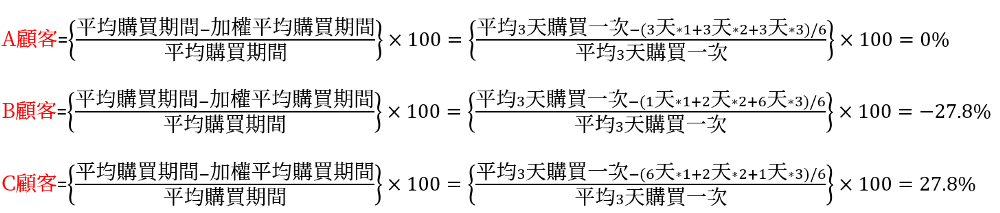

In [ ]:
df_booking_paid = pd.merge(df_booking_paid, df_booking_paid.groupby('member_id').agg({'pay_period':np.mean}), on='member_id')

In [ ]:
 df_booking_paid.member_id.unique()
#  .groupby('member_id').apply( lambda x : (x['pay_period_y'] - sum(x['cum_count']*x['pay_period_x']))/x['pay_period_y'])

In [ ]:
df_booking_paid.query('member_id =="00000bb40c7a270cd1991699858a6189"')

In [ ]:
from tqdm import tqdm_notebook
import multiprocessing as mp
import threading
import time
import dask
from dask import compute, delayed


In [ ]:
def CAI(x):
    
    return (x['pay_period_y'] - sum(x['cum_count'] * x['pay_period_x'])) /((x['pay_period_y'])+1)

In [ ]:
# d = df_booking_paid.query('member_id =="00000bb40c7a270cd1991699858a6189"')

In [ ]:
# {m: CAI(df_booking_paid.query('member_id ==@m')) for m in tqdm_notebook(df_booking_paid.member_id.unique())}

In [ ]:
(df_booking_paid.pay_period_y - (df_booking_paid.cum_count * df_booking_paid.pay_period_x))/(df_booking_paid.pay_period_y)

In [ ]:
df_booking_paid

## funnel chart

In [ ]:
import plotly.express as px
data = dict(
    number=[39, 27.4, 20.6, 11, 2],
    stage=["Website visit", "Downloads", "Potential customers", "Requested price", "invoice sent"])
fig = px.funnel(data, x='number', y='stage')
fig.show()
# https://plotly.com/python/funnel-charts/

## notes



*   分早中晚 / 季 分析轉換率
*   分產品分析轉換率


*   熟散客購買比例
*   List item





# 顧客流失預警系統
# 顧客各商品購買推薦

In [ ]:

dfnew_train = df_booking_[df_booking_.back_date < datetime.date(2019, 12, 31)]
dfnew_test = df_booking_[df_booking_.back_date >= datetime.date(2020, 02, 05)]

maxdate = dfnew_train.InvoiceDate.max()
mindate = dfnew_train.InvoiceDate.min()

dfnew_train['duration'] =  (maxdate - dfnew_train.InvoiceDate)/np.timedelta64(1, 'D')
# get time duration between the last transaction to now
dfsum1 = dfnew_train.groupby(['CustomerID'])['duration'].min().reset_index()
dfsum1.head()

dfsum1.rename(columns = {'duration':'latetime'}, inplace = True)

# get time duration between the first transaction to now
dfsum2 = dfnew_train.groupby(['CustomerID'])['duration'].max().reset_index()
dfsum2.rename(columns = {'duration':'earlytime'}, inplace = True)

# get transaction frequency (whole history)
dfnew_train['freq'] =1 
dfsum3 = dfnew_train.groupby(['CustomerID'])['freq'].sum().reset_index()

# get transaction frequency (recent 3 months history)
dfnew_train['freq_3m'] =1 
dfsum4 = dfnew_train[dfnew_train.duration<91].groupby(['CustomerID'])['freq_3m'].sum().reset_index()

dfsum = pd.merge(dfsum1, dfsum2, on=['CustomerID'], how='outer')
dfsum = pd.merge(dfsum, dfsum3, on=['CustomerID'], how='outer')
dfsum = pd.merge(dfsum, dfsum4, on=['CustomerID'], how='outer')

#get other data source
other_data = pd.read_csv('oth.csv')
list(other_data.columns)
dfsum = pd.merge(dfsum, other_data, on=['CustomerID'], how='left')

# get target 
dfnew_test['target'] = 1
dfsum_target = dfnew_test.groupby(['CustomerID'])['target'].sum().reset_index()

dfsum = pd.merge(dfsum, dfsum_target, on=['CustomerID'], how='left')
dfsum  = dfsum.fillna(0).sort_values(['target'], ascending = False)

# check all features in the modeling data
list(dfsum.columns)
dfsum.head(10)
